In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy

from test_simplify import test_basic, load_net, batch_predict
from test_batch import collect_predict,adaptive_chain_smoother,load_predict

In [3]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [8]:
def plot_trace(x,y, alpha=1.0):
    n = x.shape[0]
    plt.plot(x[:n//3],y[:n//3],'-o',color='r', alpha=alpha)
    plt.plot(x[n//3:n//3*2],y[n//3:n//3*2],'-o',color='g', alpha=alpha)
    plt.plot(x[n//3*2:],y[n//3*2:],'-o',color='b', alpha=alpha)


In [4]:
net = load_net('weights/ssd300_hor_2.pth')

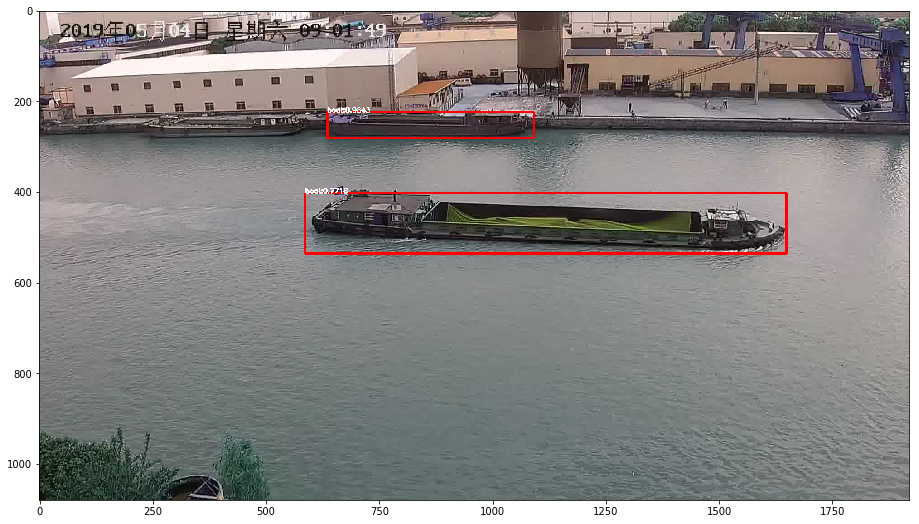

In [5]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb00088.jpg')
plt.figure(figsize=(16,9))
plt.imshow(processed)

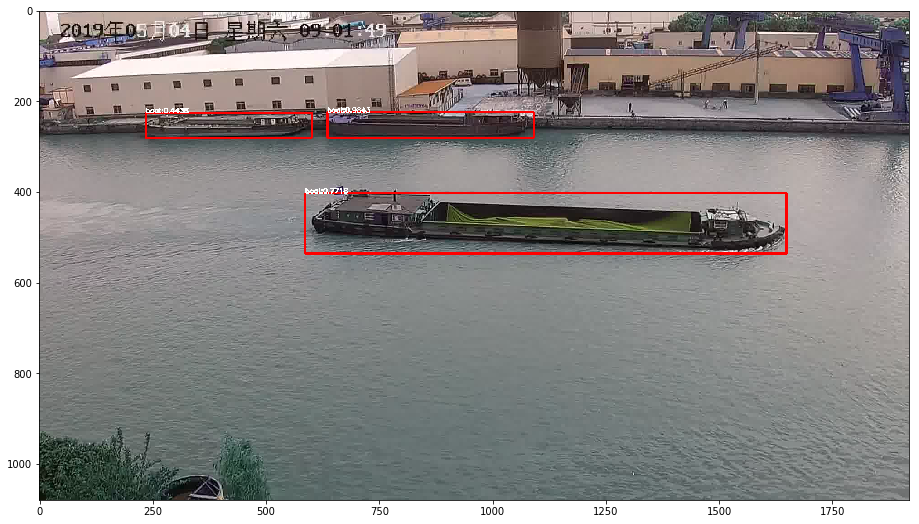

In [6]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00800_frames\thumb00088.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)

看起来网络本身还是没什么改观

In [9]:
smoother = lambda arr: adaptive_chain_smoother(arr, F=6)

In [33]:
loaded_raw = load_predict('hiv00200_cache')

In [34]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=10, verbose=True)
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

40 chain detected


[12951,
 6689,
 4388,
 2943,
 1868,
 1094,
 1061,
 724,
 568,
 499,
 434,
 376,
 319,
 306,
 253,
 243,
 202,
 144,
 132,
 122,
 120,
 107,
 101,
 96,
 95,
 95,
 82,
 79,
 78,
 73,
 66,
 59,
 39,
 30,
 27,
 26,
 24,
 3,
 2,
 1]

In [36]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=20, verbose=True)

31 chain detected


In [37]:
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

[12951,
 9632,
 4388,
 1935,
 1201,
 1061,
 724,
 568,
 565,
 434,
 402,
 398,
 376,
 319,
 253,
 243,
 144,
 132,
 122,
 120,
 95,
 82,
 79,
 78,
 73,
 59,
 30,
 26,
 24,
 3,
 2]

In [39]:
loaded_raw = load_predict('hiv00200_cache_old')

In [19]:
collected = collect_predict('hiv00200_cache_old', chain_smoother=smoother, jump_tol= 10, verbose=True)

19 chain detected


In [42]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=10, verbose=True)

19 chain detected


In [43]:
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

[12951,
 12951,
 4570,
 1624,
 1280,
 1220,
 1185,
 1123,
 1048,
 765,
 409,
 372,
 75,
 13,
 13,
 8,
 2,
 1,
 1]

In [44]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=20, verbose=True)

18 chain detected


In [45]:
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

[12951,
 12951,
 4570,
 1624,
 1280,
 1220,
 1185,
 1123,
 1048,
 765,
 409,
 372,
 75,
 13,
 13,
 10,
 1,
 1]

横比加了数据的网络结果貌似还更差了还行。

In [46]:
loaded_raw = load_predict('hiv00800_cache')

In [47]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=10, verbose=True)
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

79 chain detected


[7317,
 2670,
 2523,
 1411,
 1410,
 1258,
 1162,
 915,
 909,
 819,
 792,
 548,
 410,
 400,
 399,
 353,
 337,
 316,
 307,
 300,
 300,
 294,
 277,
 259,
 233,
 171,
 161,
 130,
 125,
 118,
 117,
 110,
 100,
 97,
 95,
 93,
 84,
 82,
 74,
 73,
 71,
 63,
 57,
 47,
 47,
 46,
 46,
 37,
 33,
 30,
 29,
 28,
 27,
 26,
 23,
 23,
 19,
 14,
 14,
 13,
 12,
 11,
 10,
 8,
 7,
 5,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [48]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=20, verbose=True)
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

67 chain detected


[7317,
 2670,
 2523,
 1411,
 1410,
 1258,
 1162,
 926,
 911,
 819,
 792,
 699,
 548,
 410,
 400,
 383,
 337,
 316,
 310,
 307,
 294,
 277,
 259,
 258,
 233,
 171,
 130,
 125,
 118,
 117,
 110,
 100,
 95,
 93,
 84,
 82,
 74,
 73,
 71,
 63,
 57,
 47,
 47,
 46,
 46,
 41,
 37,
 33,
 28,
 28,
 27,
 23,
 23,
 19,
 14,
 14,
 13,
 10,
 7,
 5,
 3,
 2,
 2,
 1,
 1,
 1,
 1]

In [49]:
loaded_raw = load_predict('hiv00800_cache_old')

In [50]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=10, verbose=True)
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

94 chain detected


[10227,
 7525,
 2715,
 2490,
 1789,
 1771,
 1735,
 1697,
 1678,
 1656,
 1525,
 1409,
 1391,
 1354,
 1069,
 994,
 961,
 938,
 888,
 750,
 737,
 413,
 70,
 60,
 55,
 54,
 46,
 45,
 43,
 42,
 39,
 37,
 29,
 21,
 20,
 16,
 15,
 15,
 14,
 13,
 12,
 12,
 10,
 9,
 8,
 8,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [51]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=20, verbose=True)
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

74 chain detected


[10227,
 7525,
 2724,
 2490,
 1789,
 1771,
 1735,
 1697,
 1678,
 1656,
 1525,
 1409,
 1391,
 1374,
 1354,
 1069,
 994,
 938,
 888,
 750,
 737,
 70,
 68,
 62,
 57,
 55,
 54,
 46,
 42,
 39,
 37,
 31,
 30,
 29,
 22,
 19,
 16,
 15,
 12,
 10,
 8,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

虽然找出一种一致的，符合美学的方法比较困难，但是仅仅用于演示的话，一些magic threshold也并非不能接受。